# Spotify Regression/Classification Problem 2022


The aim of this Jupyter Notebook file is to apply machine learning algorithm to a real dataset. The dataset comes from Spotify which captures various attributes about the songs and also include a popularity score. This project is further divided into 3 steps. First is to perform Exploratory Data Analysis, which will include the pre-liminary analysis of data, handling the missing values and visual analysis as well. The second part will be to perfrom Regression Machine Learning method which will aim to predict the popularity of a song and the last part will be a classification problem which will aim to predict the top genre of a song belongs to. The conclusion of the project will discuss the performance of the model in the Kaggle in-class competetion.

### 1. Import Libraries & Read the File

Load the required libraries and read the file.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
e
import warnings

warnings.simplefilter('ignore', category=FutureWarning)
warnings.simplefilter('ignore', category=UserWarning)
sns.set(style="white")

df = pd.read_csv("CS98XRegressionTrain.csv")
df.head()

Id                                        title            artist  \
0   1                                 My Happiness    Connie Francis   
1   2                             Unchained Melody   The Teddy Bears   
2   3                        How Deep Is Your Love          Bee Gees   
3   4                                Woman in Love  Barbra Streisand   
4   5  Goodbye Yellow Brick Road - Remastered 2014        Elton John   

         top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  \
0  adult standards  1996  107    31    45  -8    13   28  150     75     3   
1              NaN  2011  114    44    53  -8    13   47  139     49     3   
2  adult standards  1979  105    36    63  -9    13   67  245     11     3   
3  adult standards  1980  170    28    47 -16    13   33  232     25     3   
4        glam rock  1973  121    47    56  -8    15   40  193     45     3   

   pop  
0   44  
1   37  
2   77  
3   67  
4   63

### 2. Exploratory Data Analysis
#### Pre-Liminary Analysis
In order to do a pre-liminary analysis of data, .info() and .describe() will be used which will explain the data types and structure of the dataset.

In [38]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


Id         year         bpm        nrgy        dnce  \
count  453.000000   453.000000  453.000000  453.000000  453.000000   
mean   227.000000  1991.443709  118.399558   60.070640   59.565121   
std    130.914094    16.776103   25.238713   22.205284   15.484458   
min      1.000000  1948.000000   62.000000    7.000000   18.000000   
25%    114.000000  1976.000000  100.000000   43.000000   49.000000   
50%    227.000000  1994.000000  119.000000   63.000000   61.000000   
75%    340.000000  2007.000000  133.000000   78.000000   70.000000   
max    453.000000  2019.000000  199.000000  100.000000   96.000000   

               dB        live         val         dur       acous        spch  \
count  453.000000  453.000000  453.000000  453.000000  453.000000  453.000000   
mean    -8.836645   17.757174   59.465784  226.278146   32.982340    5.660044   
std      3.577187   13.830300   24.539868   63.770380   29.530015    5.550581   
min    -24.000000    2.000000    6.000000   98.000000    0.000000    2.000000   
25%    -11.000000    9.000000   42.000000  181.000000    7.000000    3.000000   
50%     -8.000000   13.000000   61.000000  223.000000   24.000000    4.000000   
75%     -6.000000   23.000000   80.000000  262.000000   58.000000    6.000000   
max     -1.000000   93.000000   99.000000  511.000000  100.000000   47.000000   

              pop  
count  453.000000  
mean    60.743929  
std     13.470083  
min     26.000000  
25%     53.000000  
50%     63.000000  
75%     71.000000  
max     84.000000

#### Handling the Missing Value
From .info(), it's quite visible that the value count for 'top genre' is less than other column values, which indicates the presence of some missing values. By using isna().sum(), it was confirmed that there are 15 cells with missing values. 

Option of eliminating these rows was chosen instead of finding the genre of songs from missing songs mannually, which would have taken long time and made the process time-consuming.

In [39]:
df.isna().sum()

Id            0
title         0
artist        0
top genre    15
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [40]:
df.dropna(how= 'any', inplace=True)

In [41]:
df.isna().sum()

Id           0
title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

#### Visual Analyis of Dataset

##### Co-relation between variables

Before analysing all the variables independently, in order to get an idea how the variables are corelated to each other, a heat map was generated using 'sns.heatmap()'. Most of the variables in the dataset are positively corelated to each other which means they implepent similar behavior. 

Text(0.5, 1.0, 'Co-relation Matrix')

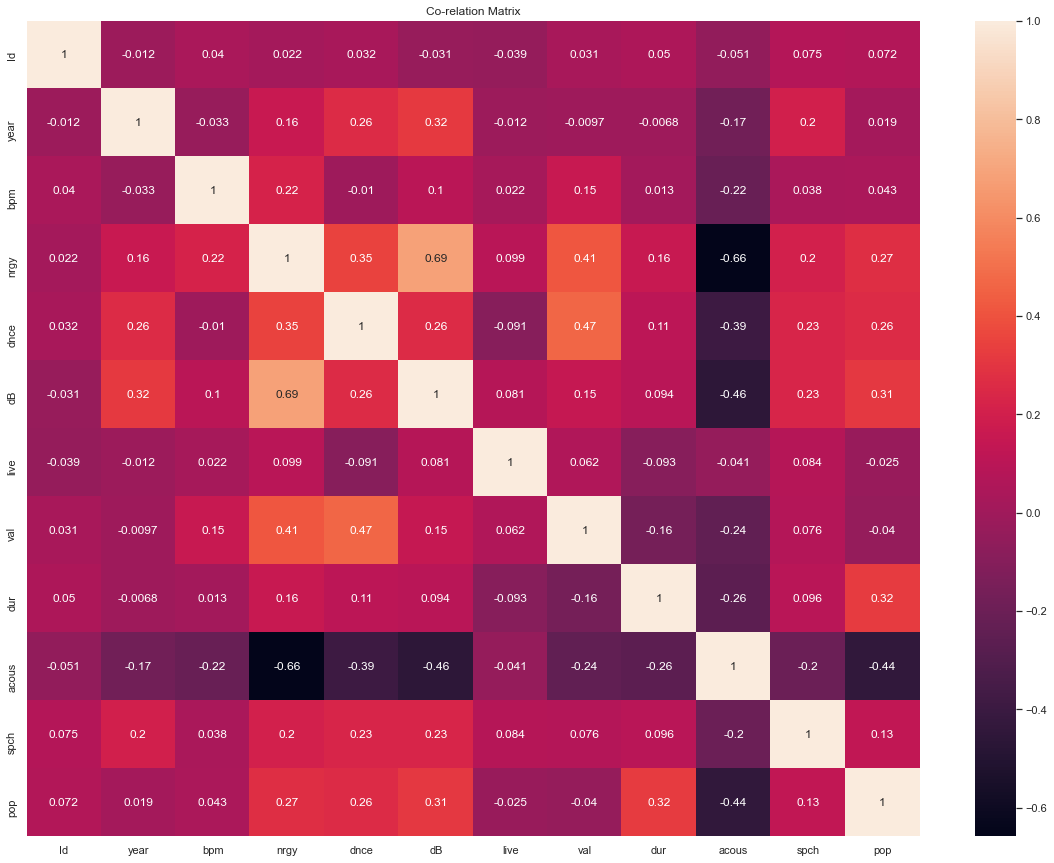

In [51]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True)
plt.title('Co-relation Matrix')

##### Pairplot

For analysisng the relationship between the variables visually, a pairplot was generated using 'sns.pairplot()'. Columns 'title', 'artist' were dropped being irrelevant.

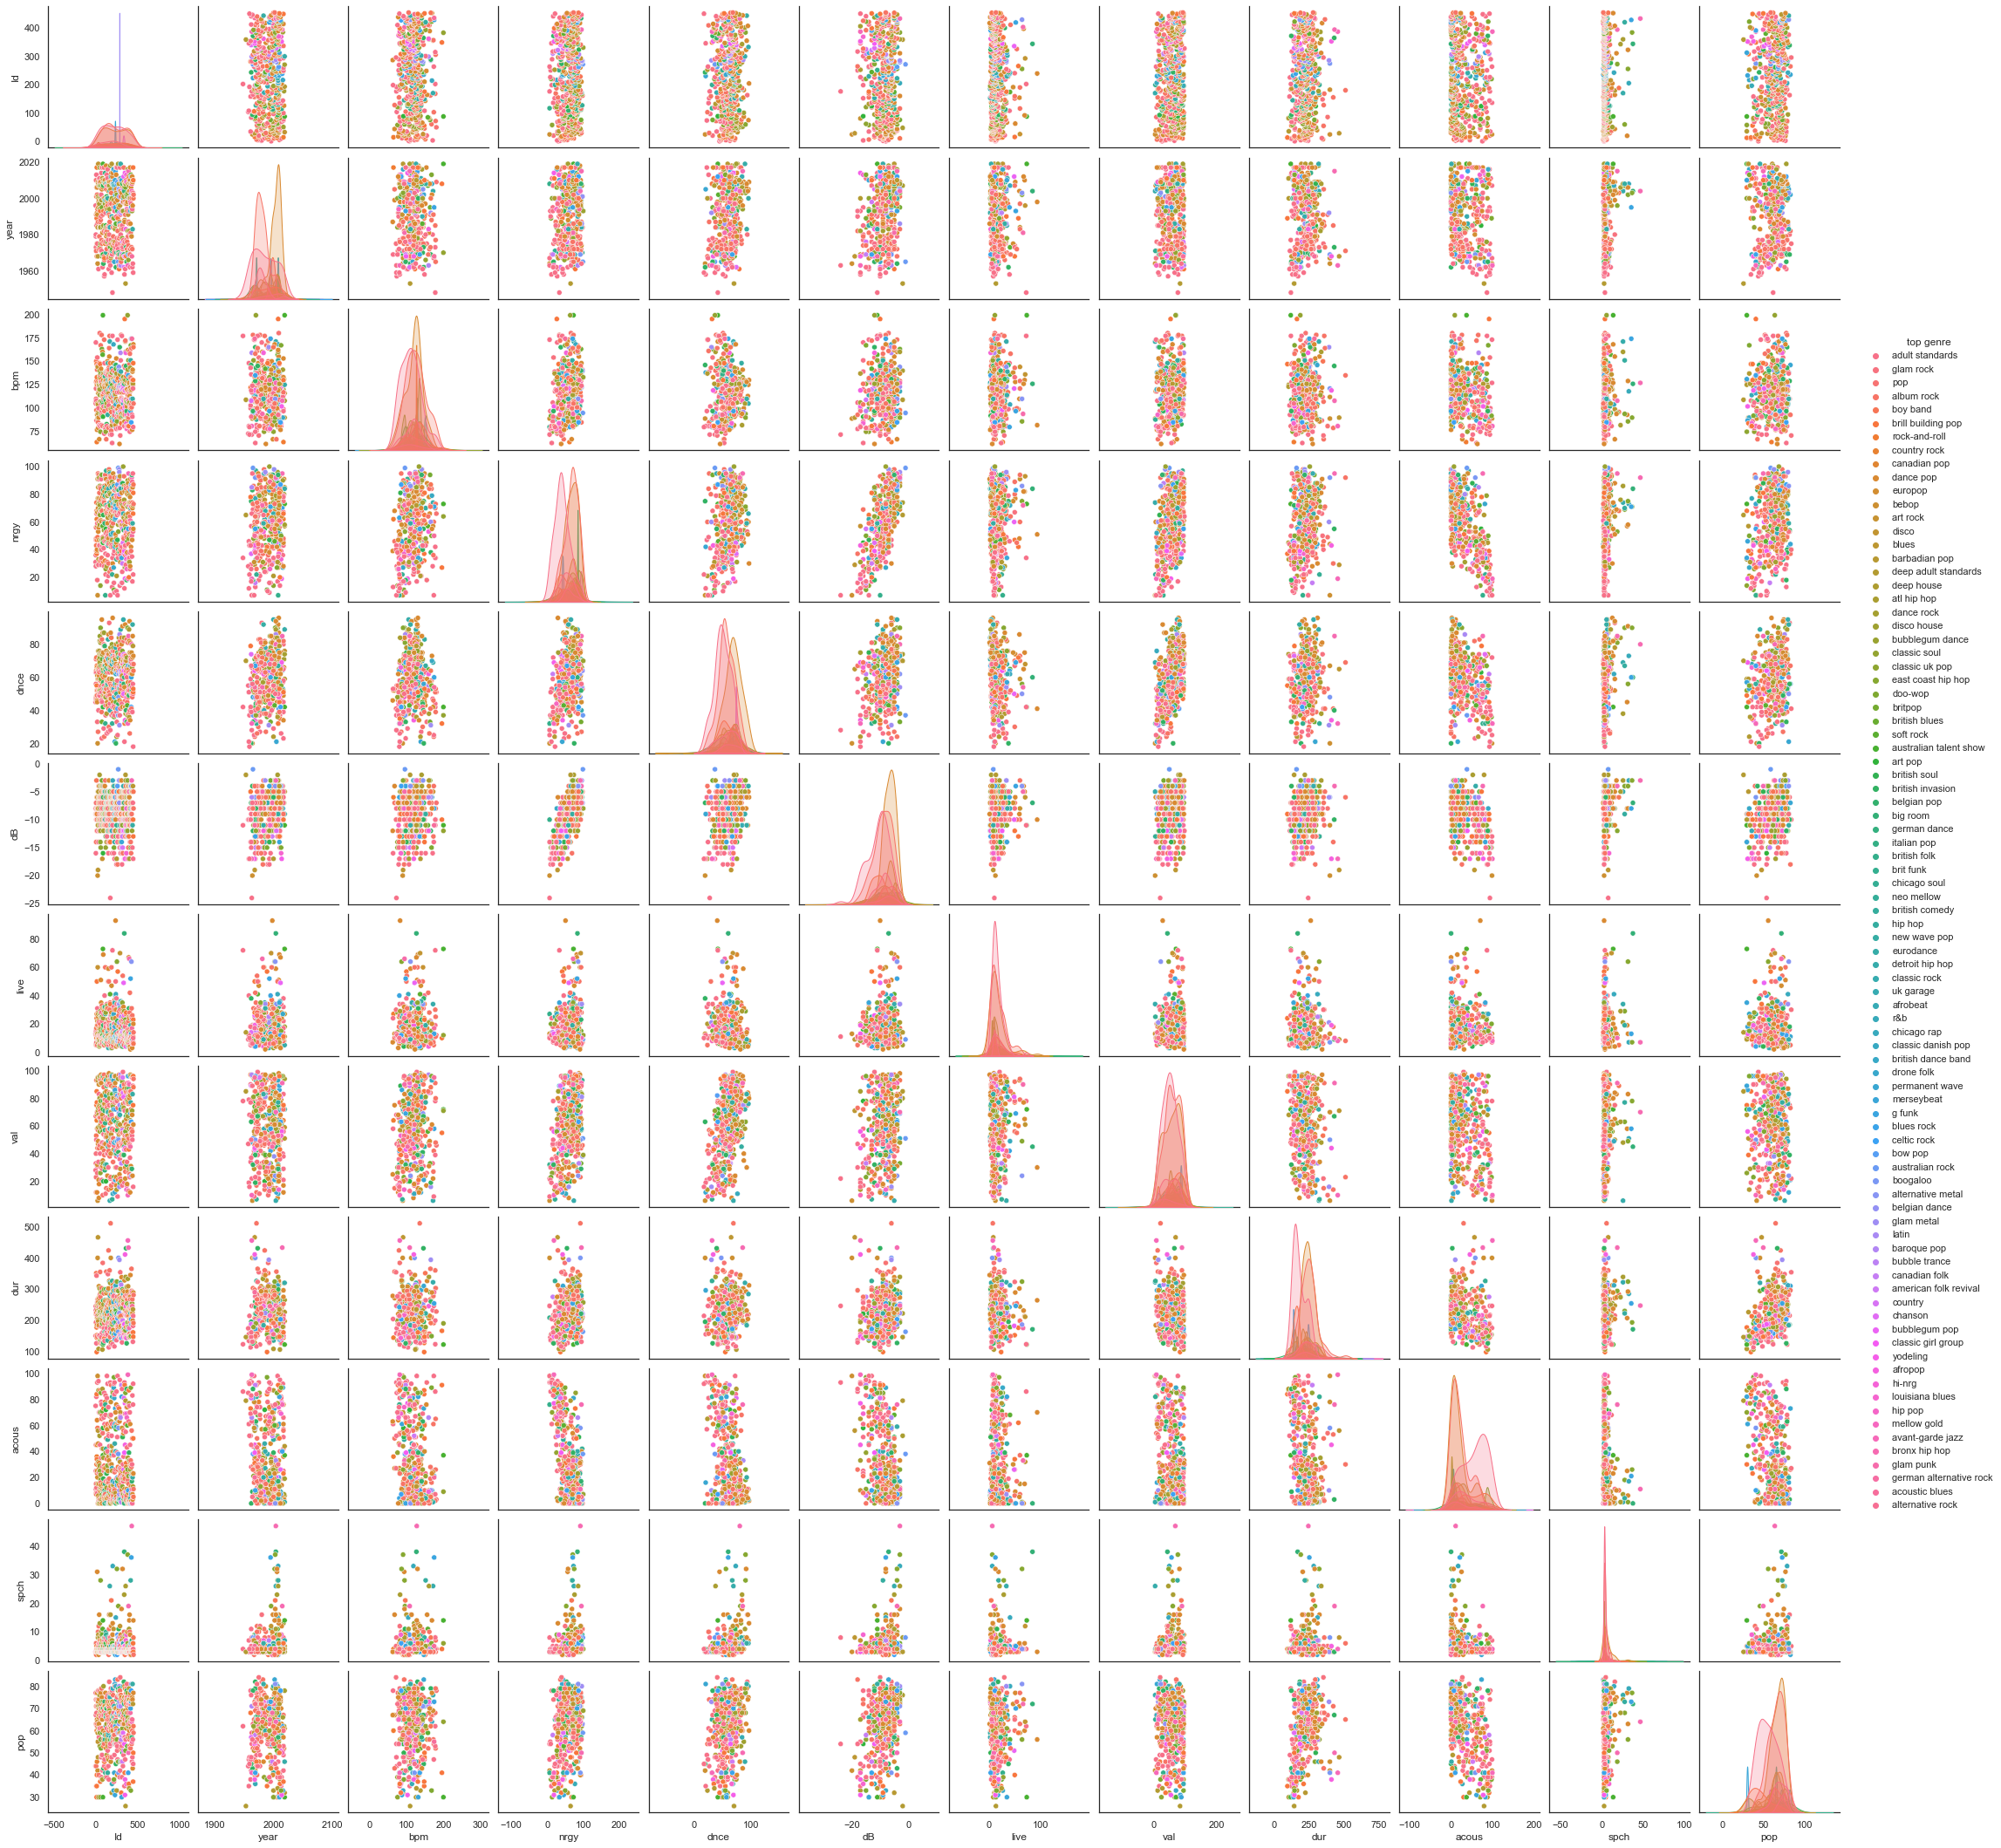

In [55]:
sns.pairplot(data=df.drop(['title', 'artist'], axis=1), hue='top genre')
plt.show()

##### Boxplot

In order to check for any outliers in the dataset, boxplot was generated. Boxplot is an effective way of analysing the dataset statistically in terms of min value, 25%, 50% (median value), 75% quantile and max value. From the plot generated, it's clearly visible that the dataset has no outliers

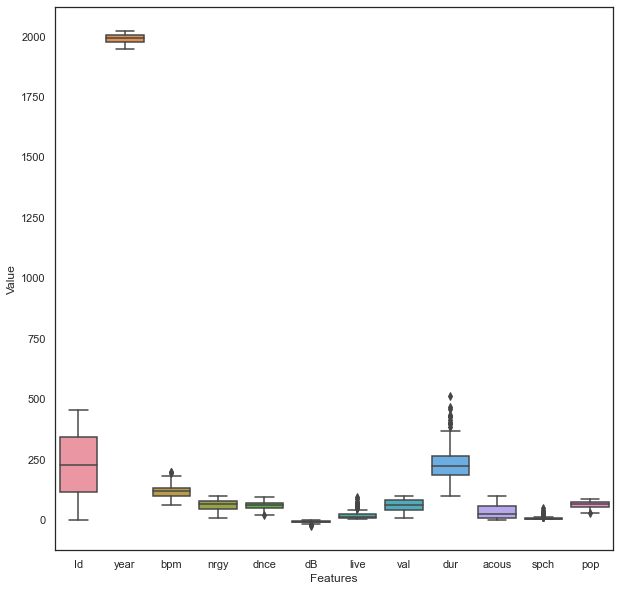

In [53]:
plt.figure(figsize = (10,10))
sns.boxplot(data=df.drop(['title', 'artist', 'top genre'], axis=1))
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()


##### Relationship between other independent variables

###### 1. Loudness vs Energy

Text(0, 0.5, 'Loudness')

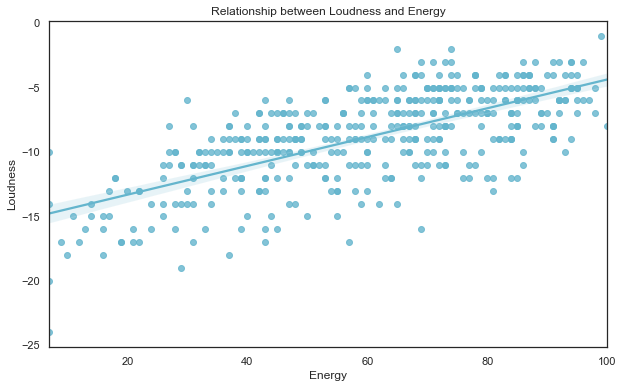

In [56]:
plt.figure(figsize = (10,6))
sns.regplot(data = df, y ='dB', x='nrgy', color= "c")
plt.title("Relationship between Loudness and Energy")
plt.xlabel('Energy')
plt.ylabel('Loudness')

###### 2. Popularity vs Acoustics

Text(0, 0.5, 'Popularity')

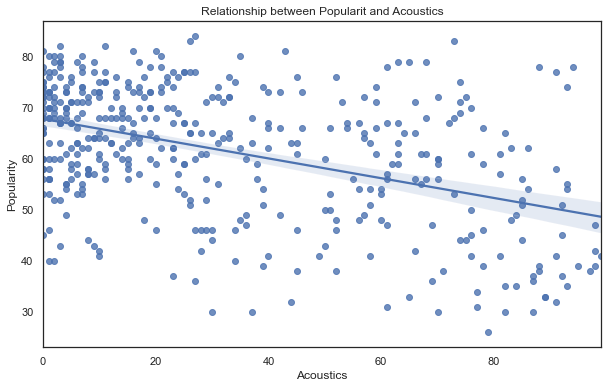

In [57]:
plt.figure(figsize = (10,6))
sns.regplot(data = df, y ='pop', x='acous', color= "b")
plt.title("Relationship between Popularity and Acoustics")
plt.xlabel('Acoustics')
plt.ylabel('Popularity')

###### 3. Popularity vs Duration

Text(0, 0.5, 'Popularity')

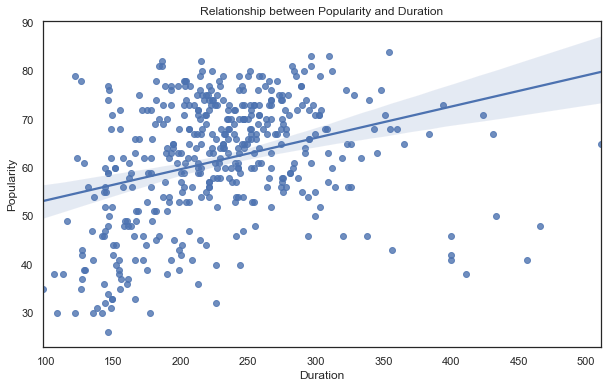

In [58]:
plt.figure(figsize = (10,6))
sns.regplot(data = df, y ='pop', x='dur', color= "b")
plt.title("Relationship between Popularity and Duration")
plt.xlabel('Duration')
plt.ylabel('Popularity')

###### 4. Duration of the songs for Different Genres

Text(0, 0.5, 'Top Genre')

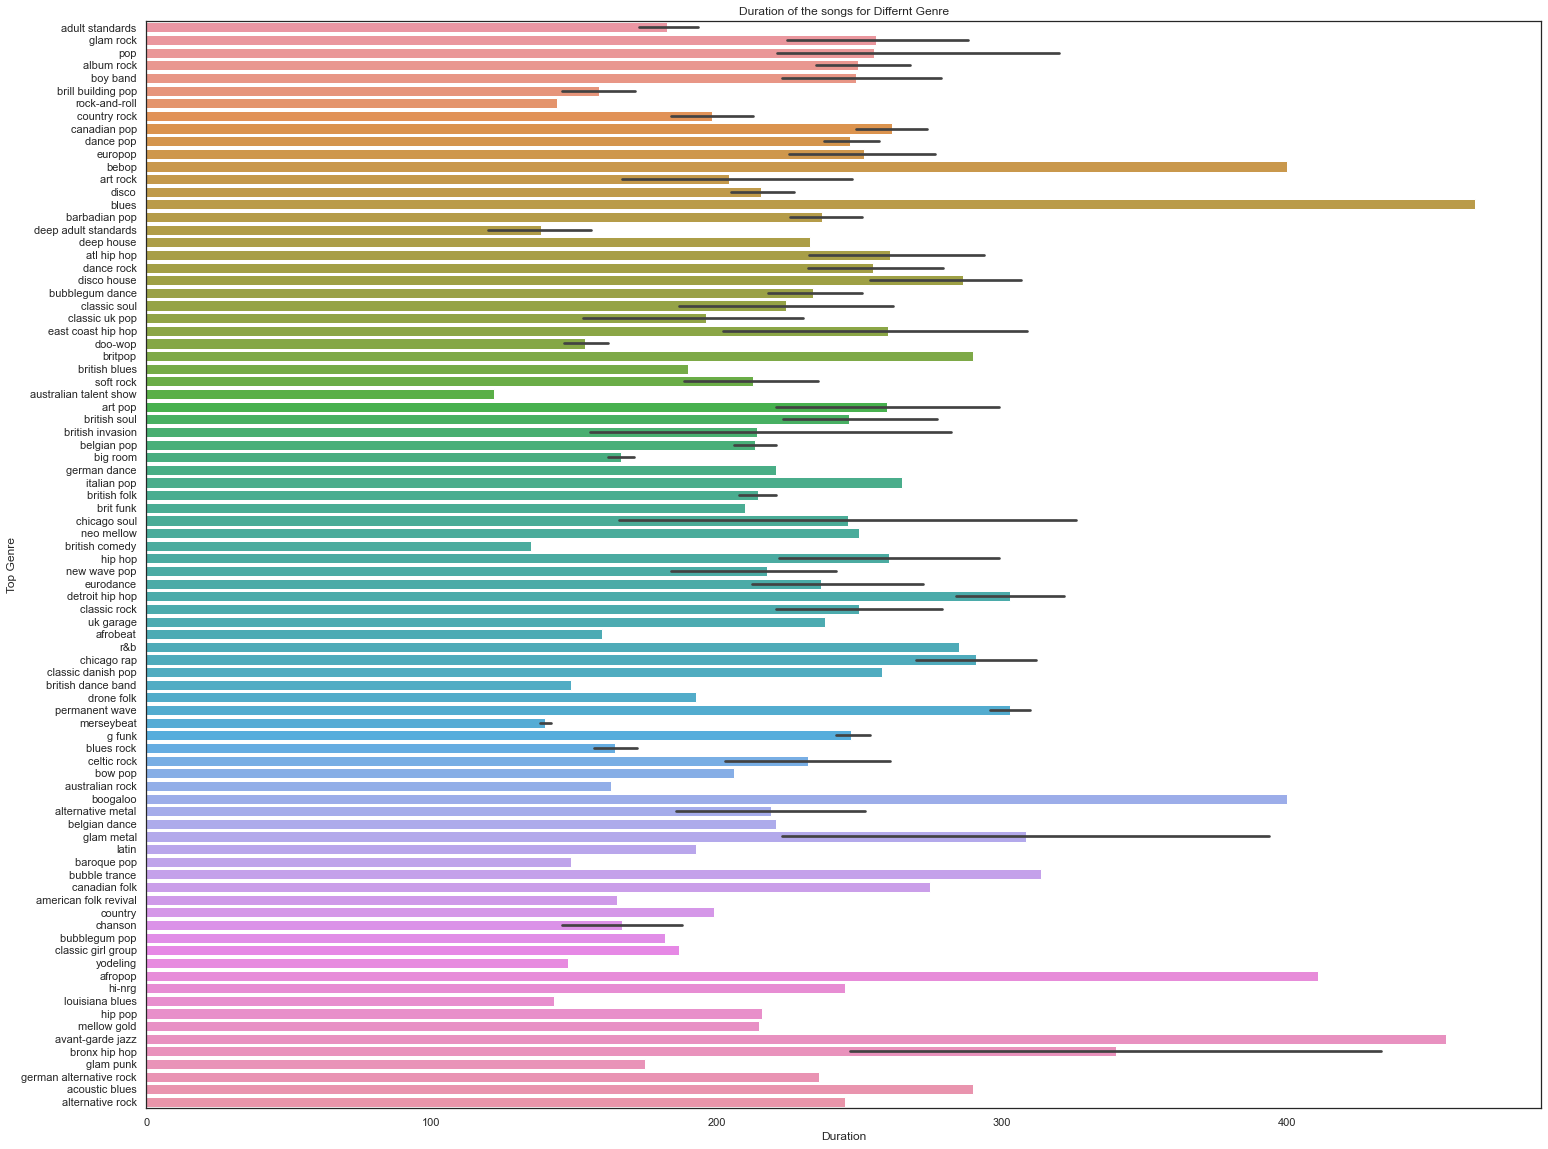

In [59]:
plt.figure(figsize = (25,20))
sns.barplot(y= 'top genre', x = 'dur', data = df)
plt.title("Duration of the songs for Differnt Genre")
plt.xlabel('Duration')
plt.ylabel('Top Genre')

###### 5. Top 5 Popular Genres

From the analysis below to find the top genre, it was concluded that the 'album rock' is the most popular genre of all.

Text(0, 0.5, 'Top Genre')

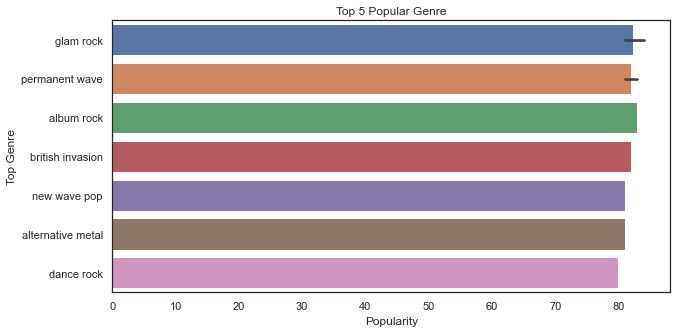

In [60]:
plt.figure(figsize = (10,5))
fam = df.sort_values("pop", ascending = False).head(10)
sns.barplot(y ='top genre', x = 'pop', data = fam).set(title = "Top 5 Popular Genre")
plt.xlabel('Popularity')
plt.ylabel('Top Genre')

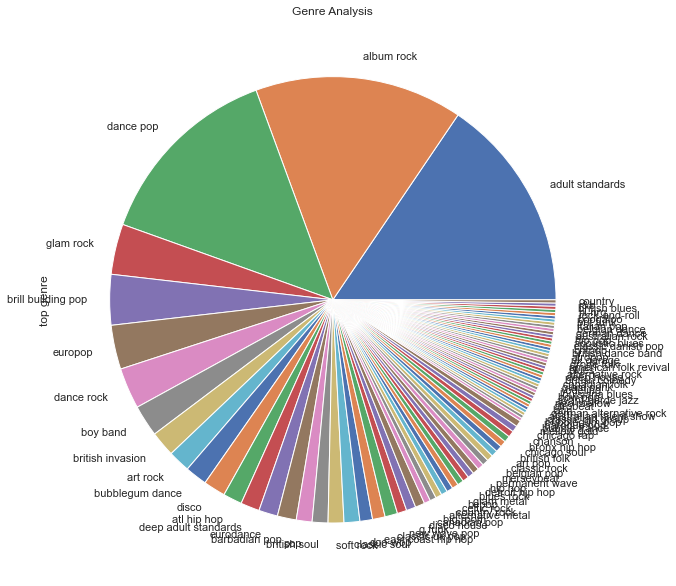

In [61]:
plt.figure(figsize = (10,15))

df['top genre'].value_counts().plot.pie()
plt.title("Genre Analysis")
plt.show()
plt.close()

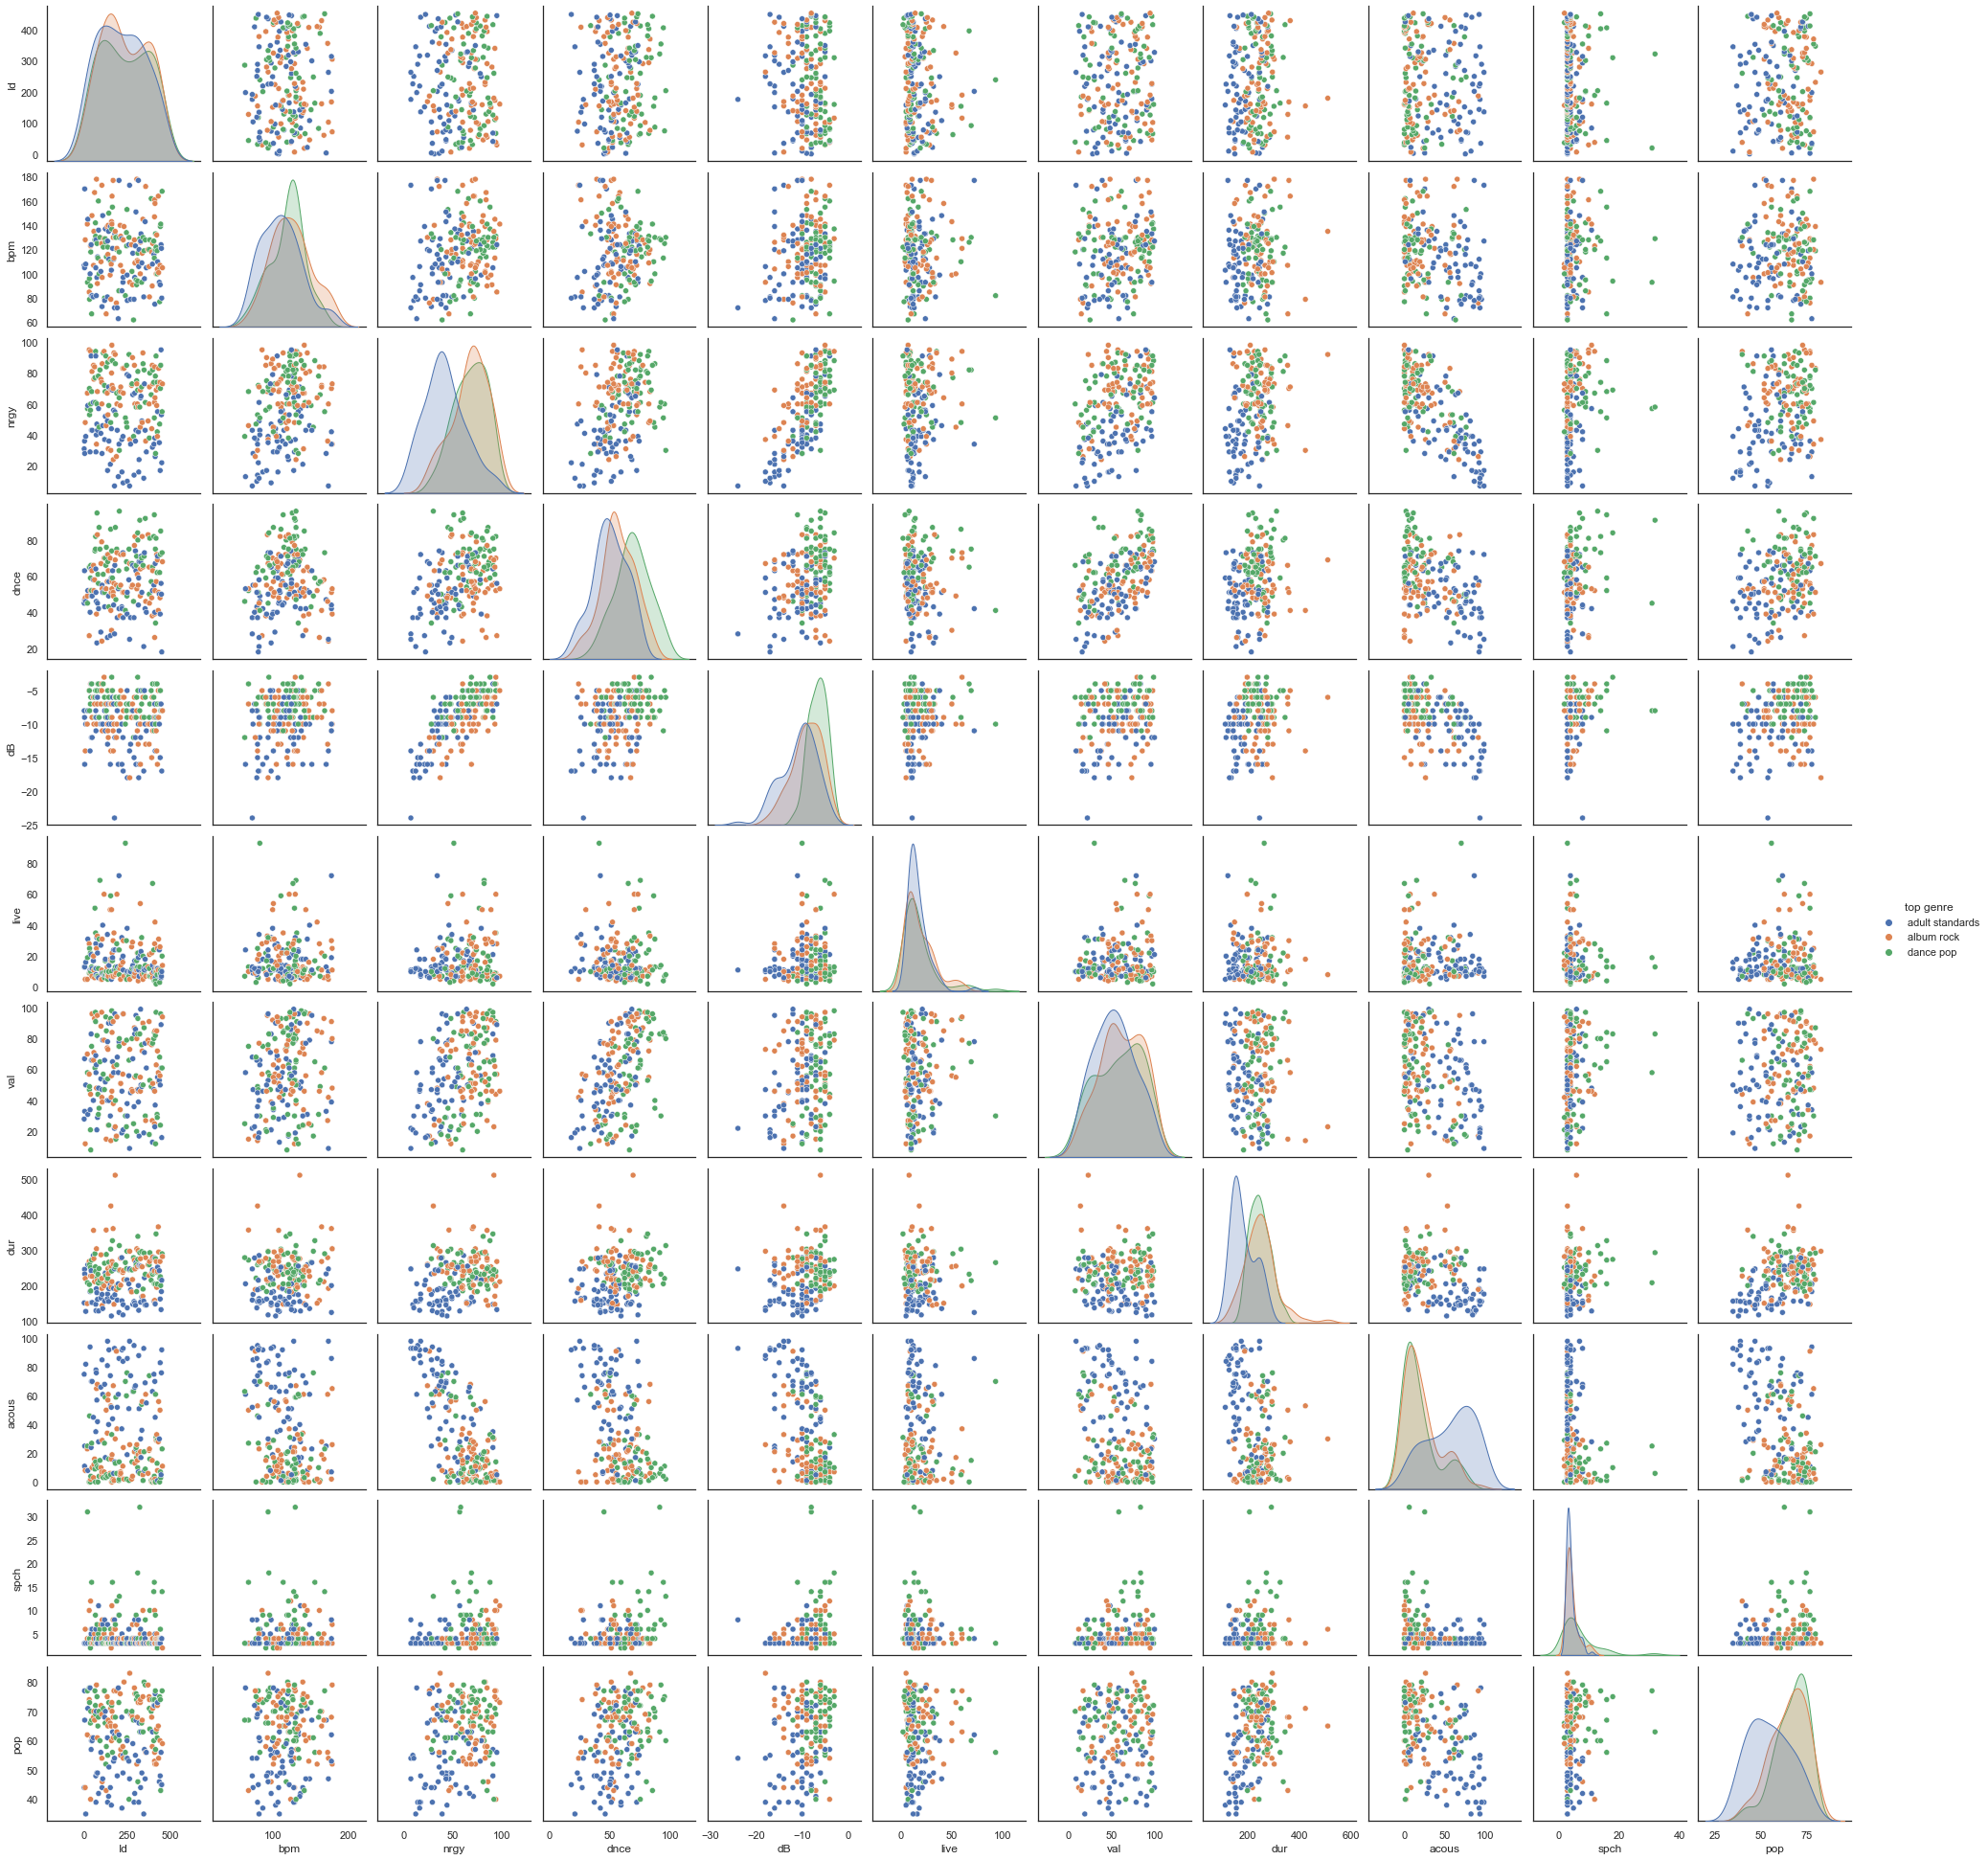

In [29]:
topgenre_list = ['dance pop', 'album rock', 'adult standards']
df1 = df.loc[df['top genre'].isin(topgenre_list)]

sns.pairplot(data=df1.drop(['title', 'artist'], axis=1), hue='top genre')
plt.show()

##### Popularity Density Plot

Text(0, 0.5, 'Density')

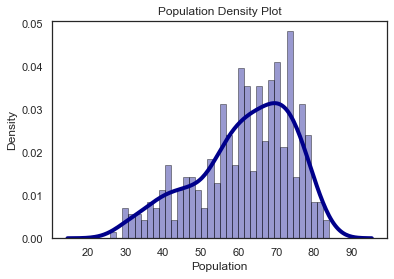

In [62]:
sns.distplot(df['pop'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title("Population Density Plot")
plt.xlabel('Population')
plt.ylabel('Density')

##### Duration

it's quite visible from the plot below that the majority number of songs are between 150-300 seconds.

Text(0, 0.5, 'Count')

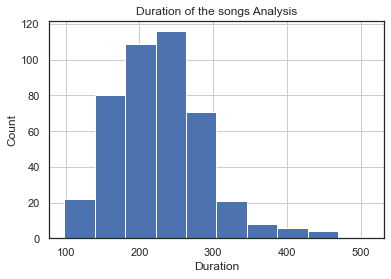

In [63]:
df.hist(column='dur')
plt.title("Duration of the songs Analysis")
plt.xlabel('Duration')
plt.ylabel('Count')